In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import janitor


In [2]:
tarro_order = pd.read_csv('/Users/yukachen/marketing-operation/restaruant-report/Orders Data - 2016-2024 Data (1).csv')
tarro_order.head() 


,orders_created_at_est_year,orders_created_at_est_day,orders_total_order_count
0,2016,07-14,3127
1,2016,03-15,2460
2,2016,01-02,3116
3,2016,01-09,2985
4,2016,10-24,3463


In [3]:
tarro_order = tarro_order.rename(columns={'orders_created_at_est_year': 'order_created_year',
                                   'orders_created_at_est_day': 'order_created_date',
                                   'orders_total_order_count': 'total_orders'})

In [4]:
# combining the year and day columns to create a datetime column
tarro_order['order_created_date_ymd'] = pd.to_datetime(
    tarro_order['order_created_year'].astype(str) + '-' + tarro_order['order_created_date'], 
    format='%Y-%m-%d'
)

In [5]:
tarro_order.head() 

,order_created_year,order_created_date,total_orders,order_created_date_ymd
0,2016,07-14,3127,2016-07-14
1,2016,03-15,2460,2016-03-15
2,2016,01-02,3116,2016-01-02
3,2016,01-09,2985,2016-01-09
4,2016,10-24,3463,2016-10-24


In [6]:
holiday = pd.read_csv('/Users/yukachen/marketing-operation/restaruant-report/Holidays.csv').clean_names()
holiday.head()

,year,holiday,date
0,2016,New Year’s Day,01-01
1,2017,New Year’s Day,01-01
2,2018,New Year’s Day,01-01
3,2019,New Year’s Day,01-01
4,2020,New Year’s Day,01-01


In [7]:
# combining the year and day columns to create a datetime column
holiday['holiday_ymd'] = pd.to_datetime(
    holiday['year'].astype(str) + '-' + holiday['date'], 
    format='%Y-%m-%d')

/var/folders/8c/z2jj76jx2wq4dxt7jlmgxknm0000gn/T/ipykernel_44578/2617338270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday['holiday_ymd'] = pd.to_datetime(


In [8]:
holiday.head()

,year,holiday,date,holiday_ymd
0,2016,New Year’s Day,01-01,2016-01-01
1,2017,New Year’s Day,01-01,2017-01-01
2,2018,New Year’s Day,01-01,2018-01-01
3,2019,New Year’s Day,01-01,2019-01-01
4,2020,New Year’s Day,01-01,2020-01-01


In [9]:
holiday_clean = holiday[['holiday_ymd','holiday']]
holiday_clean.head()

,holiday_ymd,holiday
0,2016-01-01,New Year’s Day
1,2017-01-01,New Year’s Day
2,2018-01-01,New Year’s Day
3,2019-01-01,New Year’s Day
4,2020-01-01,New Year’s Day


In [10]:
tarro_order['is_holiday'] = tarro_order['order_created_date_ymd'].isin(holiday_clean['holiday_ymd'])


In [11]:
complete_order_holiday_df = pd.merge(tarro_order, holiday_clean, left_on='order_created_date_ymd', right_on='holiday_ymd', how='left')
complete_order_holiday_df.drop(columns=['holiday_ymd'], inplace=True)
complete_order_holiday_df.head()

,order_created_year,order_created_date,total_orders,order_created_date_ymd,is_holiday,holiday
0,2016,07-14,3127,2016-07-14,False,NaN
1,2016,03-15,2460,2016-03-15,False,NaN
2,2016,01-02,3116,2016-01-02,False,NaN
3,2016,01-09,2985,2016-01-09,False,NaN
4,2016,10-24,3463,2016-10-24,False,NaN


In [12]:
complete_order_holiday_df_group = complete_order_holiday_df.groupby('is_holiday')['total_orders'].mean().reset_index()

complete_order_holiday_df_group.columns = ['Is_Holiday', 'Average_Order_Count']
complete_order_holiday_df_group  


,Is_Holiday,Average_Order_Count
0,False,32741.393511
1,True,27812.271028


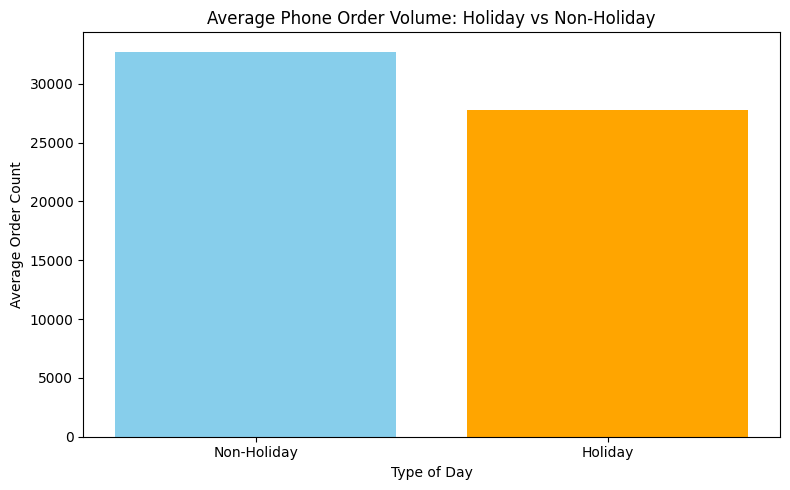

In [14]:
plt.figure(figsize=(8, 5))
plt.bar(['Non-Holiday', 'Holiday'], complete_order_holiday_df_group['Average_Order_Count'], color=['skyblue', 'orange'])
plt.title('Average Phone Order Volume: Holiday vs Non-Holiday')
plt.ylabel('Average Order Count')
plt.xlabel('Type of Day')
plt.tight_layout()
plt.show()


In [15]:
# Define a function to categorize seasons
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply function to create a 'season' column
complete_order_holiday_df['season'] = complete_order_holiday_df['order_created_date_ymd'].apply(get_season)
complete_order_holiday_df.head()


,order_created_year,order_created_date,total_orders,order_created_date_ymd,is_holiday,holiday,season
0,2016,07-14,3127,2016-07-14,False,NaN,Summer
1,2016,03-15,2460,2016-03-15,False,NaN,Spring
2,2016,01-02,3116,2016-01-02,False,NaN,Winter
3,2016,01-09,2985,2016-01-09,False,NaN,Winter
4,2016,10-24,3463,2016-10-24,False,NaN,Fall


In [16]:
# Group by 'season' and 'is_holiday', then calculate the mean of 'total_orders'
seasonal_holiday_orders = complete_order_holiday_df.groupby(['season', 'is_holiday'])['total_orders'].mean().reset_index()
seasonal_holiday_orders.columns = ['Season', 'Is_Holiday', 'Average_Order_Count']


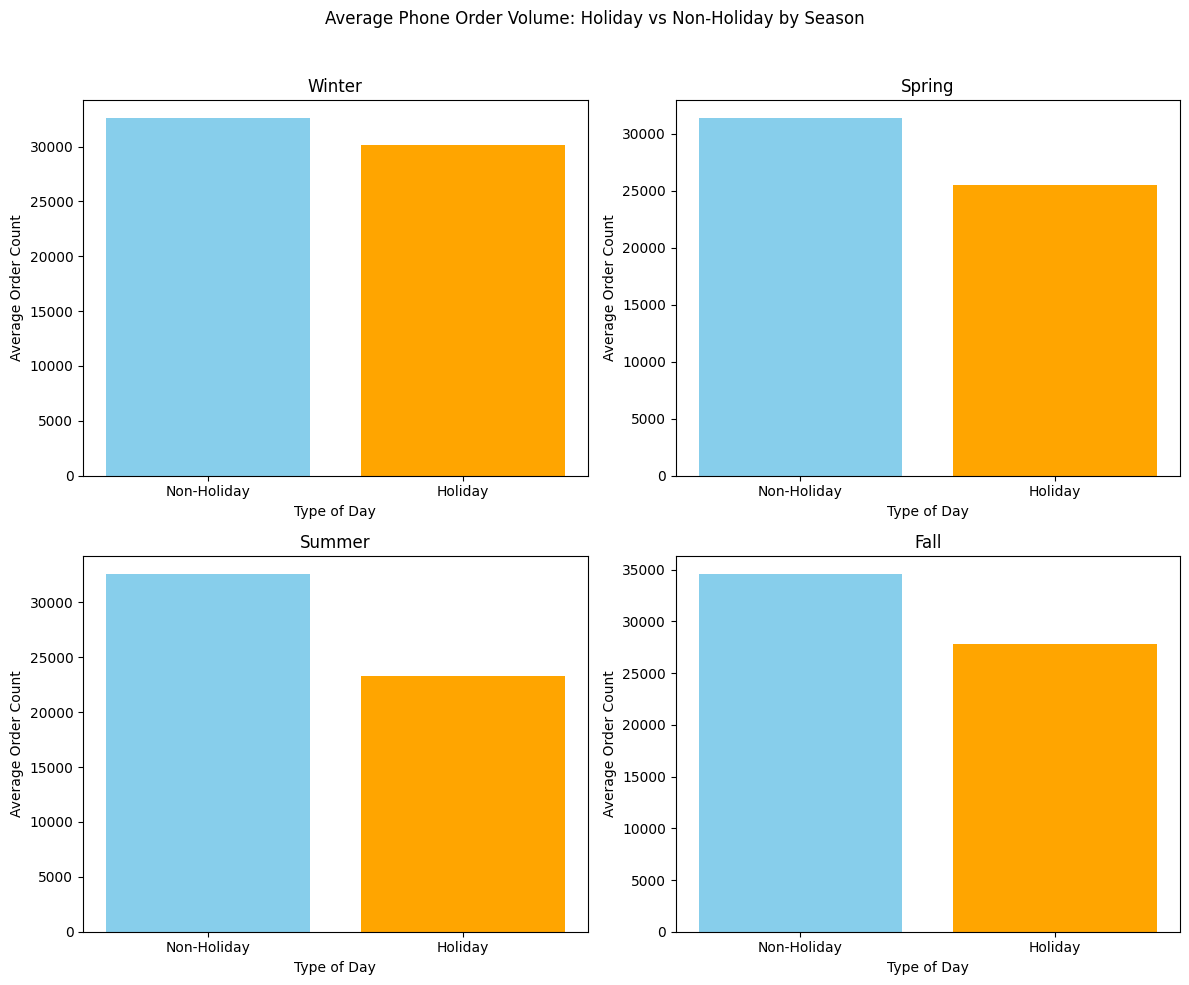

In [17]:
import matplotlib.pyplot as plt

# Set up the subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Average Phone Order Volume: Holiday vs Non-Holiday by Season')

# Define mapping of seasons to axes in the 2x2 grid
season_axes = {'Winter': axs[0, 0], 'Spring': axs[0, 1], 'Summer': axs[1, 0], 'Fall': axs[1, 1]}

# Loop through each season and plot the average order counts for holidays and non-holidays
for season, ax in season_axes.items():
    data = seasonal_holiday_orders[seasonal_holiday_orders['Season'] == season]
    ax.bar(['Non-Holiday', 'Holiday'], data['Average_Order_Count'], color=['skyblue', 'orange'])
    ax.set_title(f'{season}')
    ax.set_xlabel('Type of Day')
    ax.set_ylabel('Average Order Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the main title
plt.show()
